In [1]:
import pandas as pd

# Percorsi dei file
file1 = '../temp tools/eurgbp 120_1.csv'
file2 = '../temp tools/eurgbp 7200_1.csv'

# Leggi i file CSV (codifica utf-16, separatore tab)
df1 = pd.read_csv(file1, sep='\t', encoding='utf-16')
df2 = pd.read_csv(file2, sep='\t', encoding='utf-16')

# Rinomina le colonne rimuovendo i simboli di maggiore/minore e spazi
cols = ['DATE', 'BALANCE', 'EQUITY', 'DEPOSIT_LOAD']
df1.columns = cols
df2.columns = cols

# Converte la colonna DATE in datetime
for df in [df1, df2]:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Mostra le prime righe per verifica
df1[['DATE', 'BALANCE']].head(), df2[['DATE', 'BALANCE']].head()

(                 DATE   BALANCE
 0 2019-01-01 00:00:00  10000.00
 1 2019-01-02 13:01:00  10003.23
 2 2019-01-02 19:52:00  10003.23
 3 2019-01-02 20:00:00  10003.23
 4 2019-01-03 00:01:00  10009.12,
                  DATE   BALANCE
 0 2019-01-01 00:00:00  10000.00
 1 2019-01-01 23:10:00   9999.94
 2 2019-01-01 23:16:00   9999.94
 3 2019-01-01 23:29:00   9999.26
 4 2019-01-02 07:30:00   9999.26)

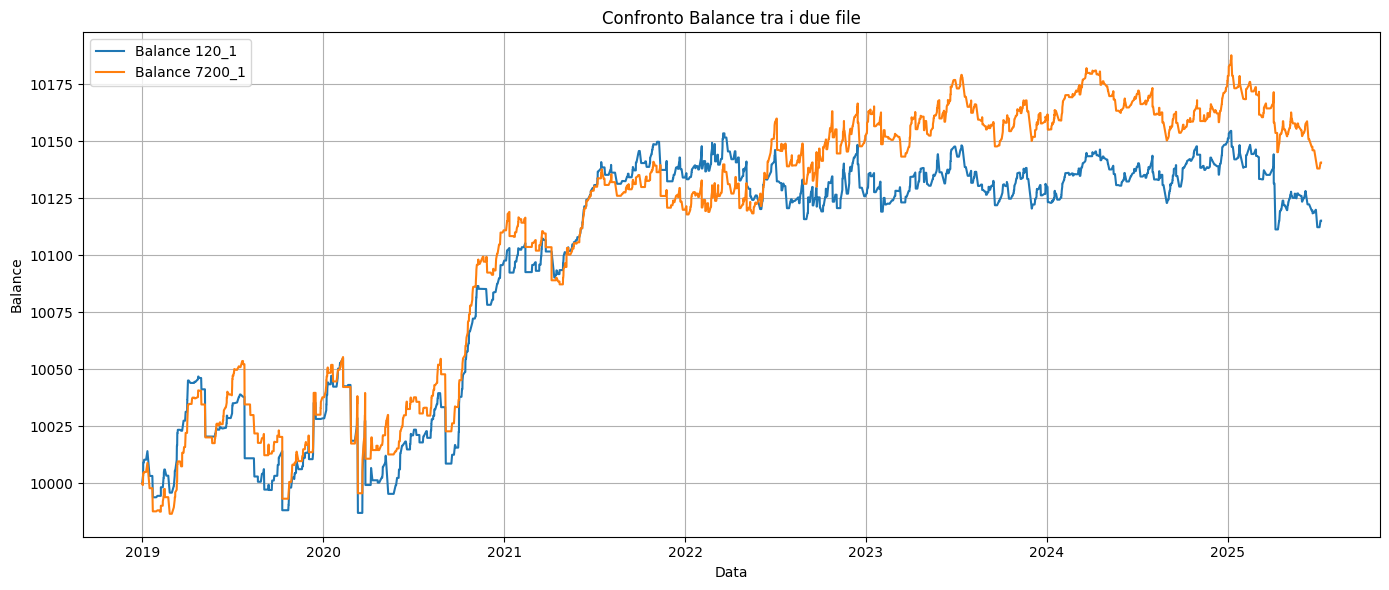

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df1['DATE'], df1['BALANCE'], label='Balance 120_1')
plt.plot(df2['DATE'], df2['BALANCE'], label='Balance 7200_1')
plt.xlabel('Data')
plt.ylabel('Balance')
plt.title('Confronto Balance tra i due file')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

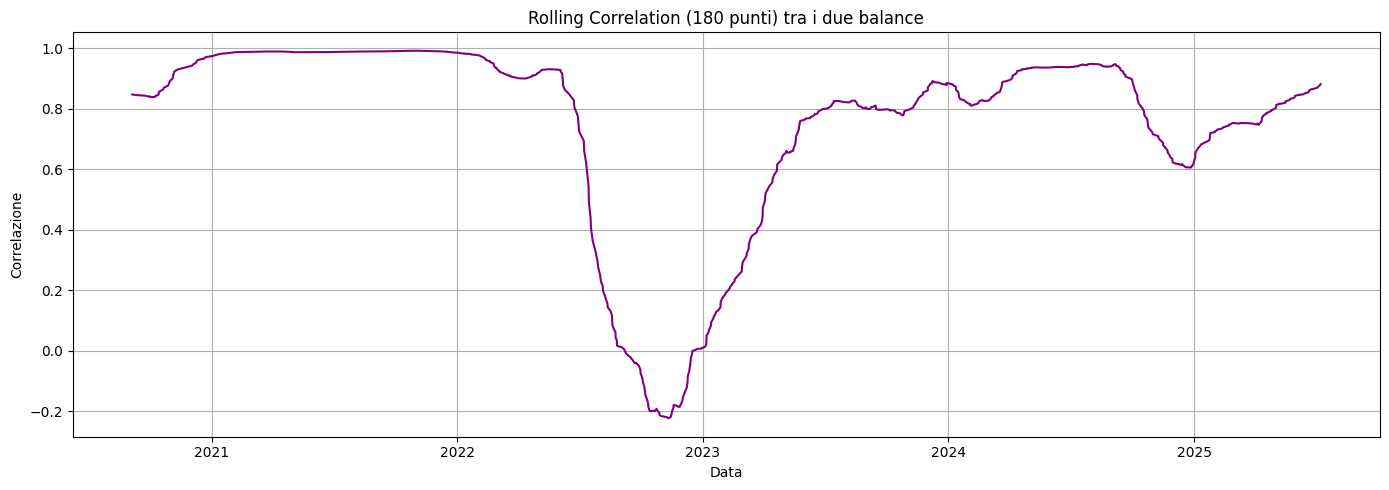

In [4]:
# Calcola la rolling correlation tra i due balance
window = 180  # Puoi modificare la finestra a piacere

# Allinea i dati sulle date comuni
merged = pd.merge(df1[['DATE', 'BALANCE']], df2[['DATE', 'BALANCE']], on='DATE', suffixes=('_120', '_7200'))

# Calcola la rolling correlation
rolling_corr = merged['BALANCE_120'].rolling(window).corr(merged['BALANCE_7200'])

plt.figure(figsize=(14,5))
plt.plot(merged['DATE'], rolling_corr, color='purple')
plt.title(f'Rolling Correlation ({window} punti) tra i due balance')
plt.xlabel('Data')
plt.ylabel('Correlazione')
plt.grid(True)
plt.tight_layout()
plt.show()

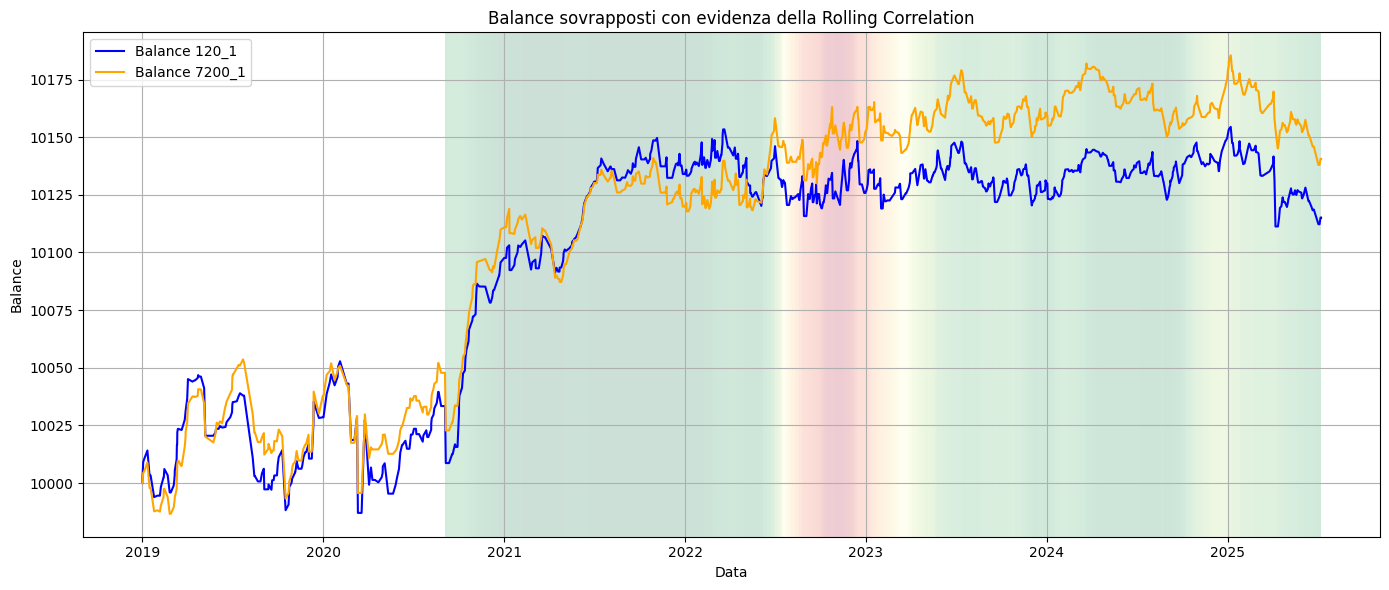

In [5]:
import numpy as np
import matplotlib.colors as mcolors

# Normalizza la rolling correlation tra 0 e 1 per la colormap
norm_corr = (rolling_corr - rolling_corr.min()) / (rolling_corr.max() - rolling_corr.min())

fig, ax = plt.subplots(figsize=(14,6))

# Plot dei due balance
ax.plot(merged['DATE'], merged['BALANCE_120'], label='Balance 120_1', color='blue')
ax.plot(merged['DATE'], merged['BALANCE_7200'], label='Balance 7200_1', color='orange')

# Colora lo sfondo in base alla rolling correlation
cmap = plt.get_cmap('RdYlGn')
for i in range(1, len(merged)):
    color = cmap(norm_corr.iloc[i]) if not np.isnan(norm_corr.iloc[i]) else (1,1,1,0)
    ax.axvspan(merged['DATE'].iloc[i-1], merged['DATE'].iloc[i], color=color, alpha=0.2, linewidth=0)

ax.set_xlabel('Data')
ax.set_ylabel('Balance')
ax.set_title('Balance sovrapposti con evidenza della Rolling Correlation')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Nota: le aree più verdi indicano correlazione più forte, le aree più rosse correlazione debole o negativa.